In [ ]:
!pip install 'scanpy[leiden]' anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import anndata
import scanpy as sc
import pandas as pd

In [ ]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor="white")

<ipython-input-3-07875c021589>:2: FutureWarning: Use `print_header` instead
  sc.logging.print_versions()


## PBMCs

In [ ]:
# this is an earlier version of the dataset from the pbmc3k tutorial
adata_ref = sc.datasets.pbmc3k_processed()
adata = sc.datasets.pbmc68k_reduced()

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

In [ ]:
adata_ref.obs

,n_genes,percent_mito,n_counts,louvain
index,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells


In [ ]:
adata_ref.var

,n_cells
index,
TNFRSF4,155
SRM,355
TNFRSF1B,379
EFHD2,523
C1QA,36
...,...
ATP5O,1191
TTC3,327
SUMO3,570


In [ ]:
adata.obs

,bulk_labels,n_genes,percent_mito,n_counts,S_score,G2M_score,phase,louvain
index,,,,,,,,
AAAGCCTGGCTAAC-1,CD14+ Monocyte,1003,0.023856,2557.0,-0.119160,-0.816889,G1,1
AAATTCGATGCACA-1,Dendritic,1080,0.027458,2695.0,0.067026,-0.889498,S,1
AACACGTGGTCTTT-1,CD56+ NK,1228,0.016819,3389.0,-0.147977,-0.941749,G1,3
AAGTGCACGTGCTA-1,CD4+/CD25 T Reg,1007,0.011797,2204.0,0.065216,1.469291,G2M,9
ACACGAACGGAGTG-1,Dendritic,1178,0.017277,3878.0,-0.122974,-0.868185,G1,2
...,...,...,...,...,...,...,...,...
TGGCACCTCCAACA-8,Dendritic,1166,0.008840,3733.0,-0.124456,-0.867484,G1,2
TGTGAGTGCTTTAC-8,Dendritic,1014,0.022068,2311.0,-0.298056,-0.649070,G1,1
TGTTACTGGCGATT-8,CD4+/CD25 T Reg,1079,0.012821,3354.0,0.216895,-0.527338,S,0


In [ ]:
adata.var

,n_counts,means,dispersions,dispersions_norm,highly_variable
index,,,,,
TNFRSF4,304.358154,0.193332,1.760724,2.746426,True
SRM,1951.078857,0.861733,1.579264,0.830446,True
TNFRSF1B,1449.664551,0.701057,1.573476,0.923793,True
EFHD2,1573.367676,0.743160,1.385345,0.158980,False
C1QA,3897.893066,1.316818,3.346717,3.661704,True
...,...,...,...,...,...
ATP5O,6403.902832,1.702504,1.246861,-0.625107,False
TTC3,620.721680,0.361153,1.320868,0.095480,False
SUMO3,2008.512939,0.878592,1.412841,0.174762,False


In [ ]:
var_names = adata_ref.var_names.intersection(adata.var_names)
var_names

Index(['TNFRSF4', 'SRM', 'TNFRSF1B', 'EFHD2', 'C1QA', 'C1QB', 'STMN1',
       'MARCKSL1', 'SMAP2', 'PRDX1',
       ...
       'EIF3D', 'LGALS2', 'ADSL', 'TTC38', 'TYMP', 'ATP5O', 'TTC3', 'SUMO3',
       'S100B', 'PRMT2'],
      dtype='object', name='index', length=208)

In [ ]:
adata_ref = adata_ref[:, var_names].copy()

In [ ]:
adata = adata[:, var_names].copy()

In [ ]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

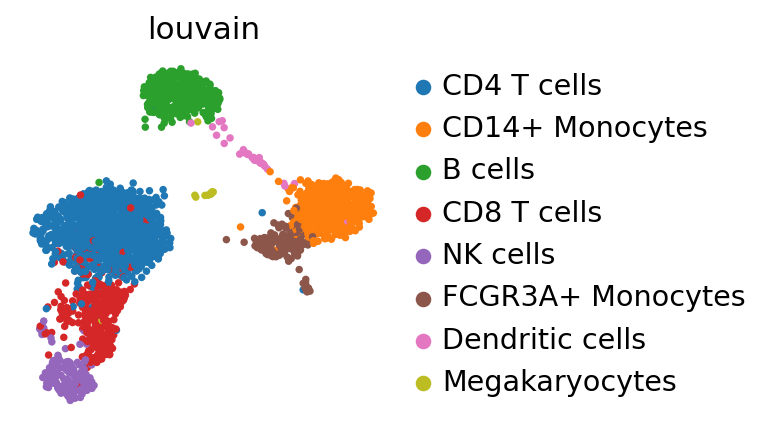

In [ ]:
sc.pl.umap(adata_ref, color="louvain")

## Mapping PBMCs using ingest

In [ ]:
sc.tl.ingest(adata, adata_ref, obs="louvain")

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
adata.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]  # fix colors

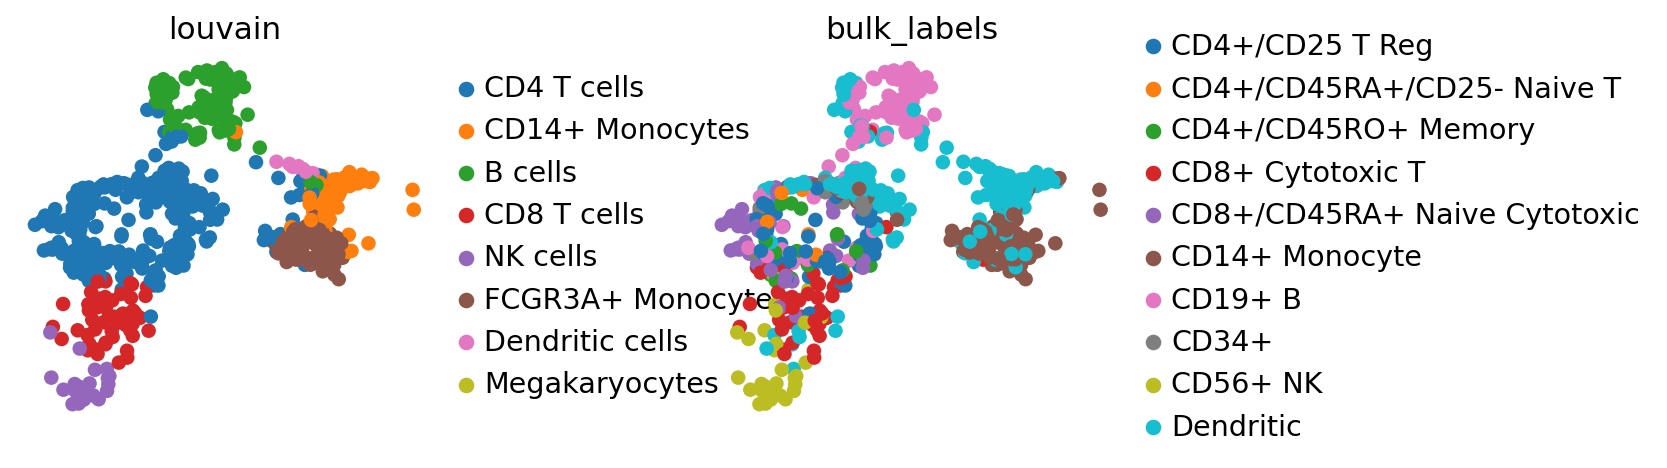

In [ ]:
sc.pl.umap(adata, color=["louvain", "bulk_labels"], wspace=0.5)

In [ ]:
adata_concat = anndata.concat([adata_ref, adata], label="batch", keys=["ref", "new"])

In [ ]:
adata_concat.obs["louvain"] = (
    adata_concat.obs["louvain"]
    .astype("category")
    .cat.reorder_categories(adata_ref.obs["louvain"].cat.categories)
)
# fix category colors
adata_concat.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]

## Using BBKNN

In [ ]:
!pip install bbknn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp311-cp311-linux_x86_64.whl size=553320 sha256=ada0b5e0e223d50d292912fd22e3cb76eafcd673f67861f9b60c1240cc739517
  Stored in directory: /root/.cache/pip/wheels/33/e5/58/0a3e34b92bedf09b4c57e37a63ff395ade6f6c1099ba59877c
Successfully built annoy


In [ ]:
sc.tl.pca(adata_concat)

In [ ]:
%%time
sc.external.pp.bbknn(adata_concat, batch_key="batch")  # running bbknn 1.3.6

CPU times: user 3.39 s, sys: 40.3 ms, total: 3.43 s
Wall time: 3.73 s


In [ ]:
sc.tl.umap(adata_concat)

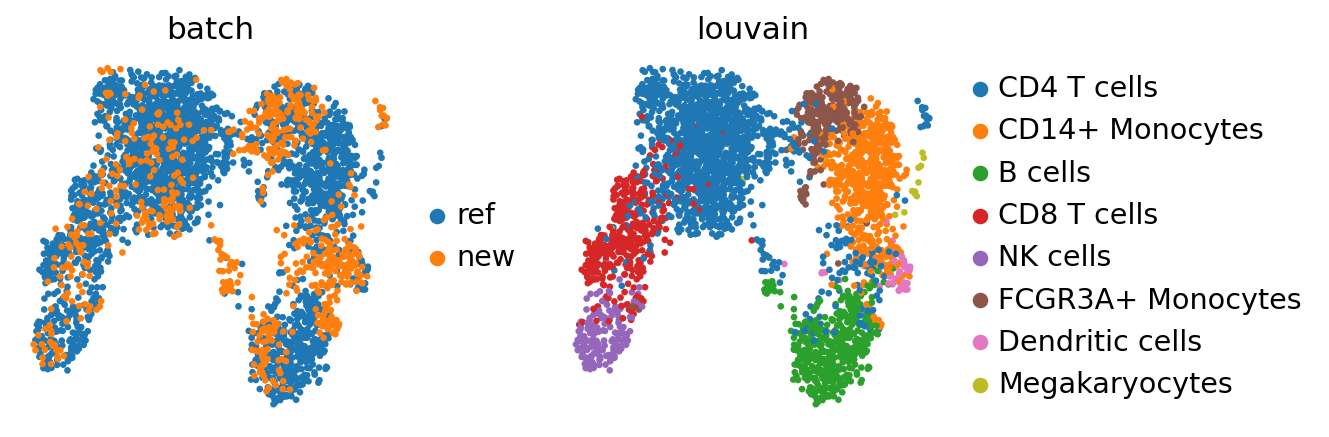

In [ ]:
sc.pl.umap(adata_concat, color=["batch", "louvain"])

## Pancreas

In [ ]:
# note that this collection of batches is already intersected on the genes
adata_all = sc.read(
    "data/pancreas.h5ad",
    backup_url="https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1",
)

  0%|          | 0.00/176M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/anndata/compat/__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/usr/local/lib/python3.11/dist-packages/anndata/compat/__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [ ]:
adata_all.shape

(14693, 2448)

In [ ]:
counts = adata_all.obs["celltype"].value_counts()
counts.to_frame()

,count
celltype,
alpha,4214
beta,3354
ductal,1804
acinar,1368
not applicable,1154
delta,917
gamma,571
endothelial,289
activated_stellate,284


In [ ]:
minority_classes = counts.index[-5:].tolist()  # get the minority classes
# actually subset
adata_all = adata_all[~adata_all.obs["celltype"].isin(minority_classes)].copy()
# reorder according to abundance
adata_all.obs["celltype"] = adata_all.obs["celltype"].cat.reorder_categories(
    counts.index[:-5].tolist()
)

## Seeing the batch effect

In [ ]:
sc.pp.pca(adata_all)
sc.pp.neighbors(adata_all)
sc.tl.umap(adata_all)

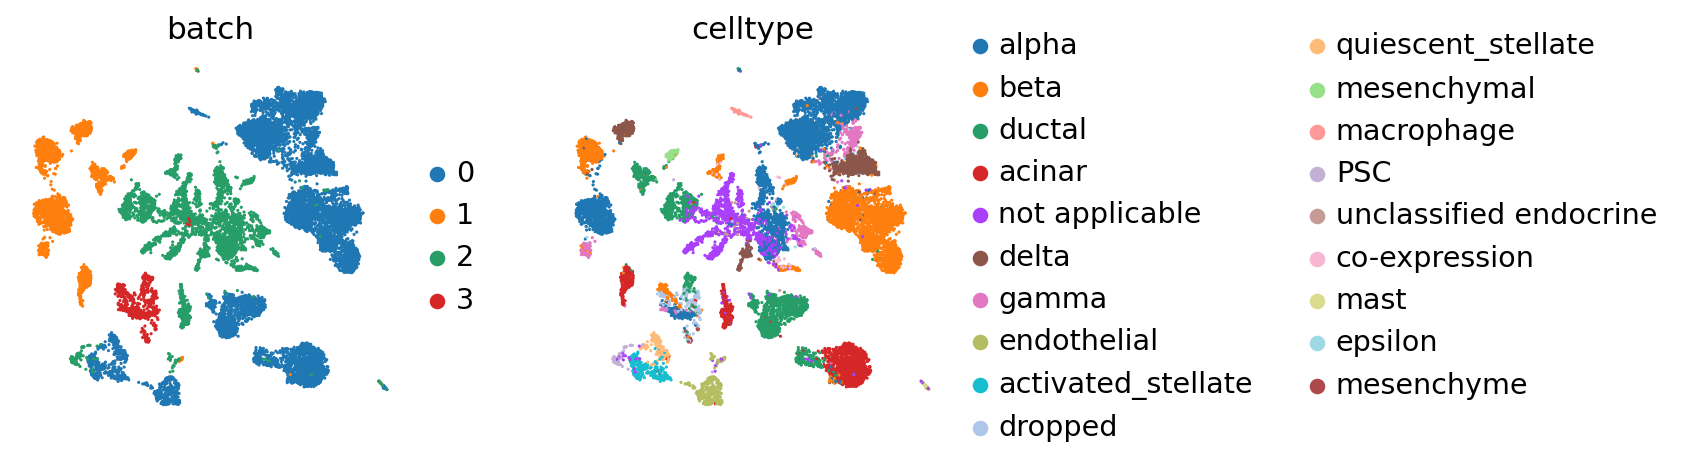

In [ ]:
sc.pl.umap(
    adata_all, color=["batch", "celltype"], palette=sc.pl.palettes.vega_20_scanpy
)

## BBKNN

In [ ]:
%%time
sc.external.pp.bbknn(adata_all, batch_key="batch")

CPU times: user 2.48 s, sys: 10.7 ms, total: 2.49 s
Wall time: 3.05 s


In [ ]:
sc.tl.umap(adata_all)

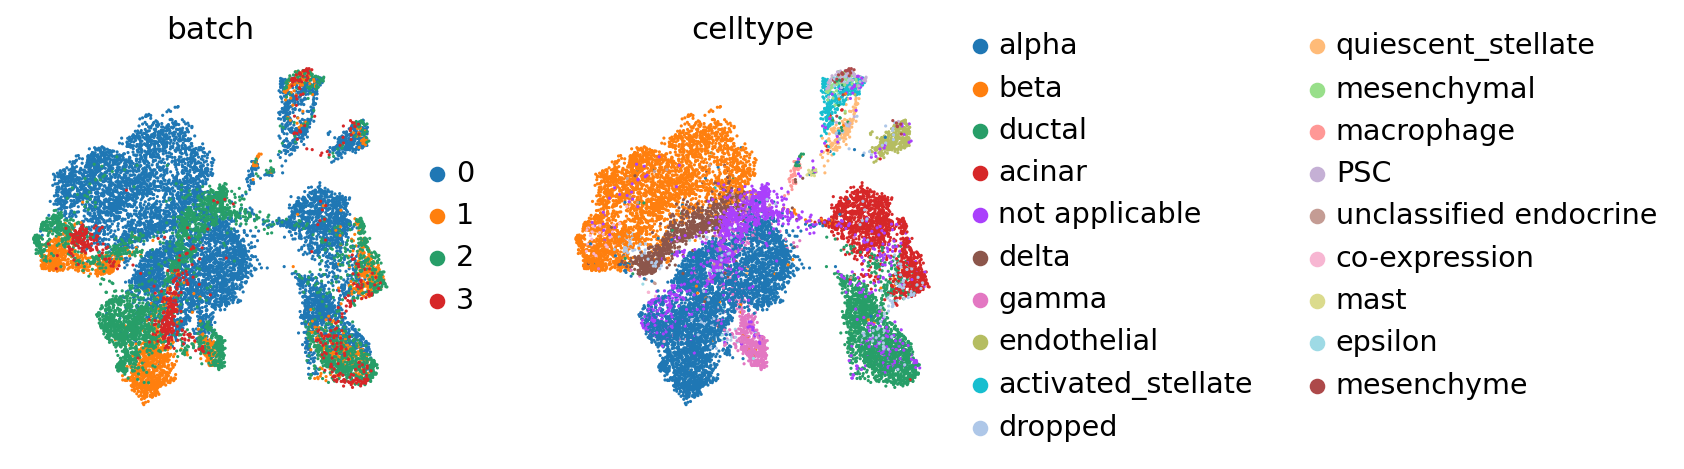

In [ ]:
sc.pl.umap(adata_all, color=["batch", "celltype"])

## Mapping onto a reference batch using ingest

In [ ]:
adata_ref = adata_all[adata_all.obs["batch"] == "0"].copy()

In [ ]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

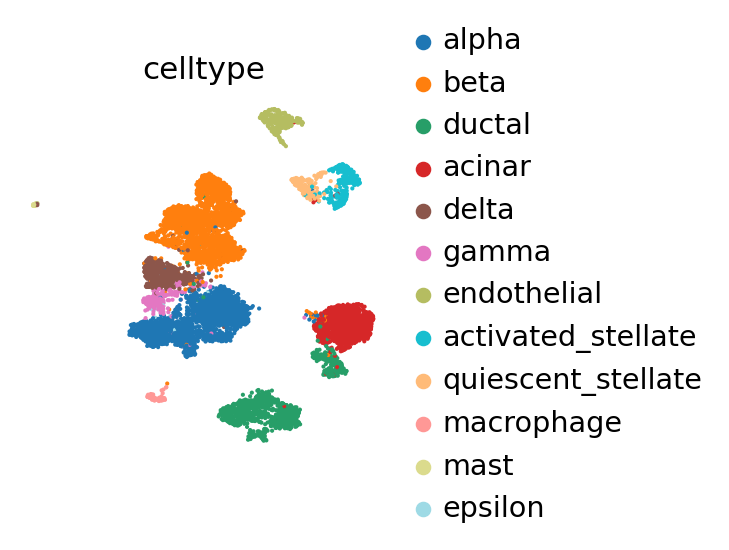

In [ ]:
sc.pl.umap(adata_ref, color="celltype")

In [ ]:
adatas = [adata_all[adata_all.obs["batch"] == i].copy() for i in ["1", "2", "3"]]

In [ ]:
sc.settings.verbosity = 2  # a bit more logging
for iadata, adata in enumerate(adatas, 1):
    print(f"... integrating batch {iadata}")
    adata.obs["celltype_orig"] = adata.obs["celltype"]  # save the original cell type
    sc.tl.ingest(adata, adata_ref, obs="celltype")

... integrating batch 1
running ingest


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    finished (0:00:05)
... integrating batch 2
running ingest


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    finished (0:00:05)
... integrating batch 3
running ingest


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


    finished (0:00:02)


In [ ]:
adata_concat = anndata.concat([adata_ref, *adatas], label="batch", join="outer")

In [ ]:
adata_concat.obs["celltype"] = (
    adata_concat.obs["celltype"]
    .astype("category")
    .cat.reorder_categories(adata_ref.obs["celltype"].cat.categories)
)
# fix category coloring
adata_concat.uns["celltype_colors"] = adata_ref.uns["celltype_colors"]

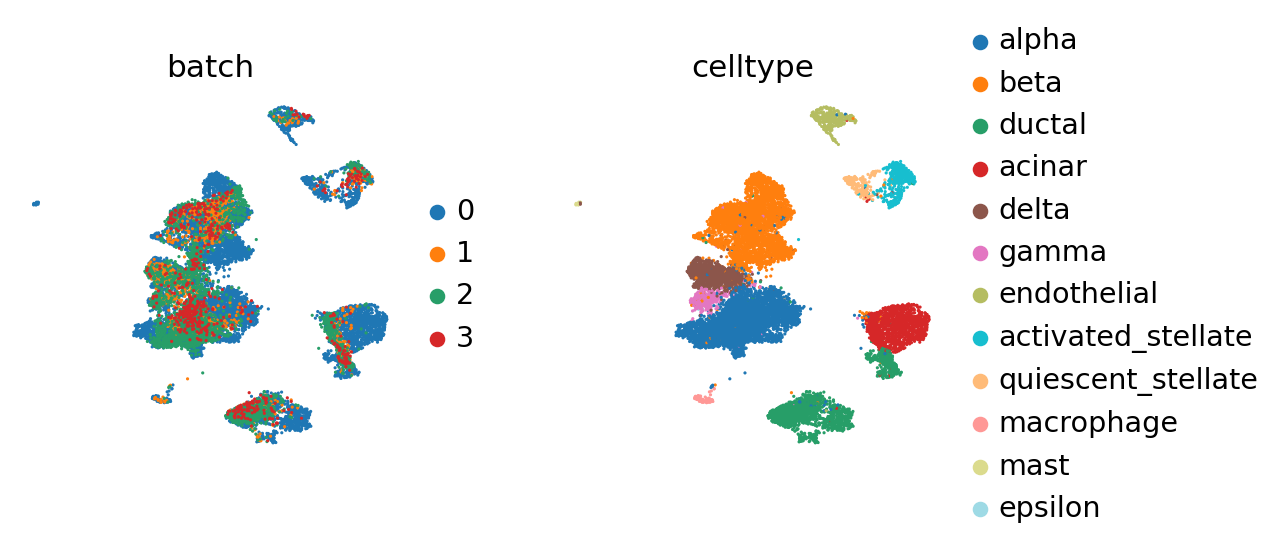

In [ ]:
sc.pl.umap(adata_concat, color=["batch", "celltype"])

## Evaluating consistency

In [ ]:
adata_query = adata_concat[adata_concat.obs["batch"].isin(["1", "2", "3"])].copy()

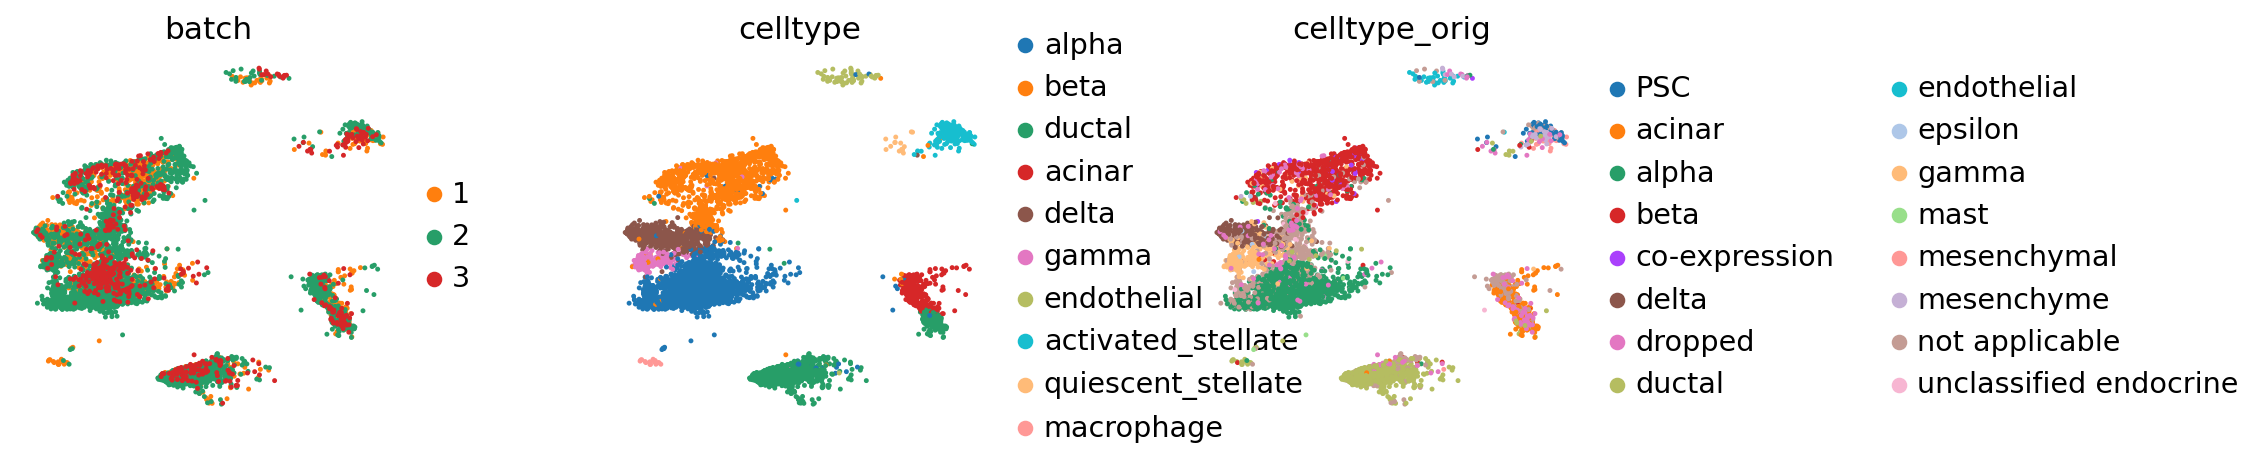

In [ ]:
sc.pl.umap(adata_query, color=["batch", "celltype", "celltype_orig"], wspace=0.4)

## Cell types conserved across batches

In [ ]:
# intersected categories
conserved_categories = adata_query.obs["celltype"].cat.categories.intersection(
    adata_query.obs["celltype_orig"].cat.categories
)
# intersect categories
obs_query_conserved = adata_query.obs.loc[
    adata_query.obs["celltype"].isin(conserved_categories)
    & adata_query.obs["celltype_orig"].isin(conserved_categories)
].copy()
# remove unused categories
obs_query_conserved["celltype"] = obs_query_conserved[
    "celltype"
].cat.remove_unused_categories()
# remove unused categories and fix category ordering
obs_query_conserved["celltype_orig"] = (
    obs_query_conserved["celltype_orig"]
    .cat.remove_unused_categories()
    .cat.reorder_categories(obs_query_conserved["celltype"].cat.categories)
)

In [ ]:
pd.crosstab(obs_query_conserved["celltype"], obs_query_conserved["celltype_orig"])

celltype_orig,alpha,beta,ductal,acinar,delta,gamma,endothelial
celltype,,,,,,,
alpha,1811,3,13,1,1,20,0
beta,56,806,6,1,10,37,0
ductal,7,6,684,241,0,0,0
acinar,2,3,3,165,0,3,0
delta,6,3,2,0,305,72,0
gamma,1,5,0,1,0,184,0
endothelial,2,0,0,0,0,0,36


## All cell types

In [ ]:
pd.crosstab(adata_query.obs["celltype"], adata_query.obs["celltype_orig"])

celltype_orig,PSC,acinar,alpha,beta,co-expression,delta,dropped,ductal,endothelial,epsilon,gamma,mast,mesenchymal,mesenchyme,not applicable,unclassified endocrine
celltype,,,,,,,,,,,,,,,,
alpha,0,1,1811,3,2,1,37,13,0,3,20,7,0,0,311,10
beta,1,1,56,806,37,10,42,6,0,0,37,0,0,1,520,24
ductal,0,241,7,6,0,0,39,684,0,0,0,0,2,0,96,0
acinar,0,165,2,3,0,0,23,3,0,0,3,0,0,0,90,0
delta,0,0,6,3,0,305,13,2,0,6,72,0,0,0,96,7
gamma,0,1,1,5,0,0,2,0,0,1,184,0,0,0,15,0
endothelial,1,0,2,0,0,0,6,0,36,0,0,0,0,6,7,0
activated_stellate,48,1,1,1,0,0,11,6,0,0,0,0,78,20,17,0
quiescent_stellate,4,0,1,1,0,0,5,1,1,0,0,0,0,0,1,0


### Density plot

In [ ]:
sc.tl.embedding_density(adata_concat, groupby="batch")

computing density on 'umap'


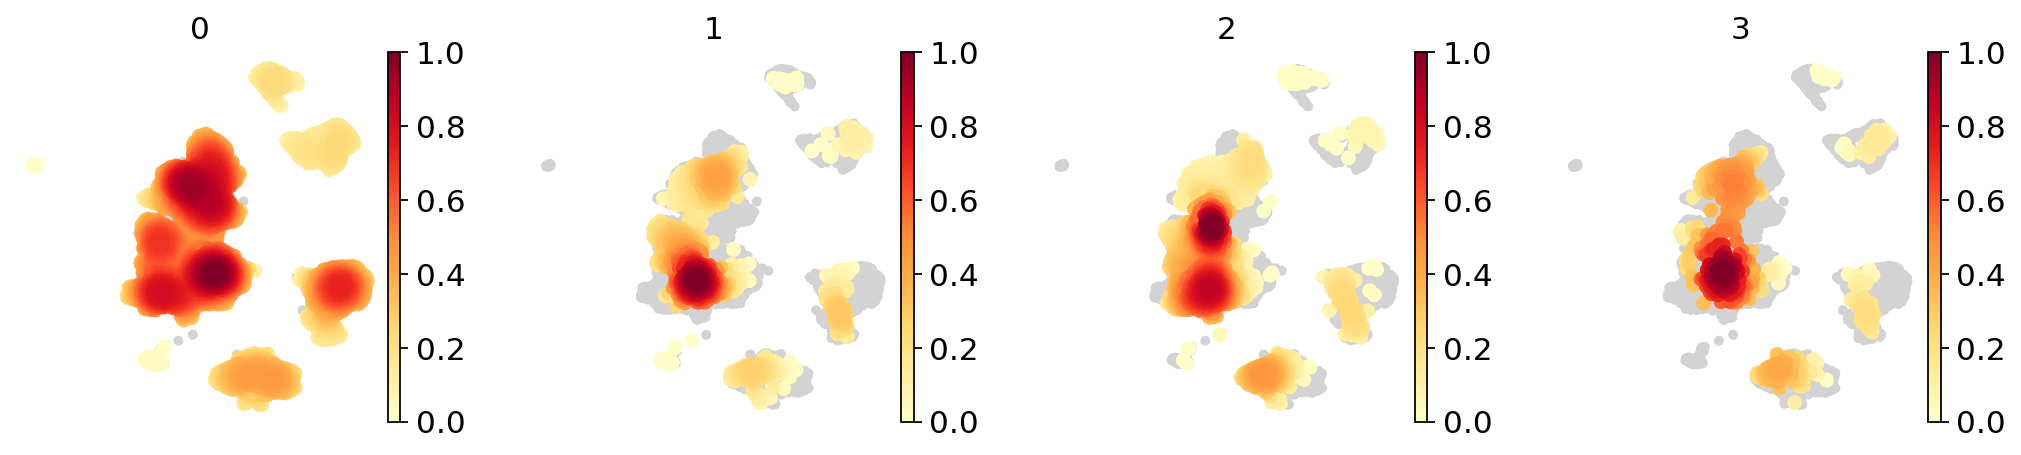

In [ ]:
sc.pl.embedding_density(adata_concat, groupby="batch")

### Partial visualizaton of a subset of groups in embedding

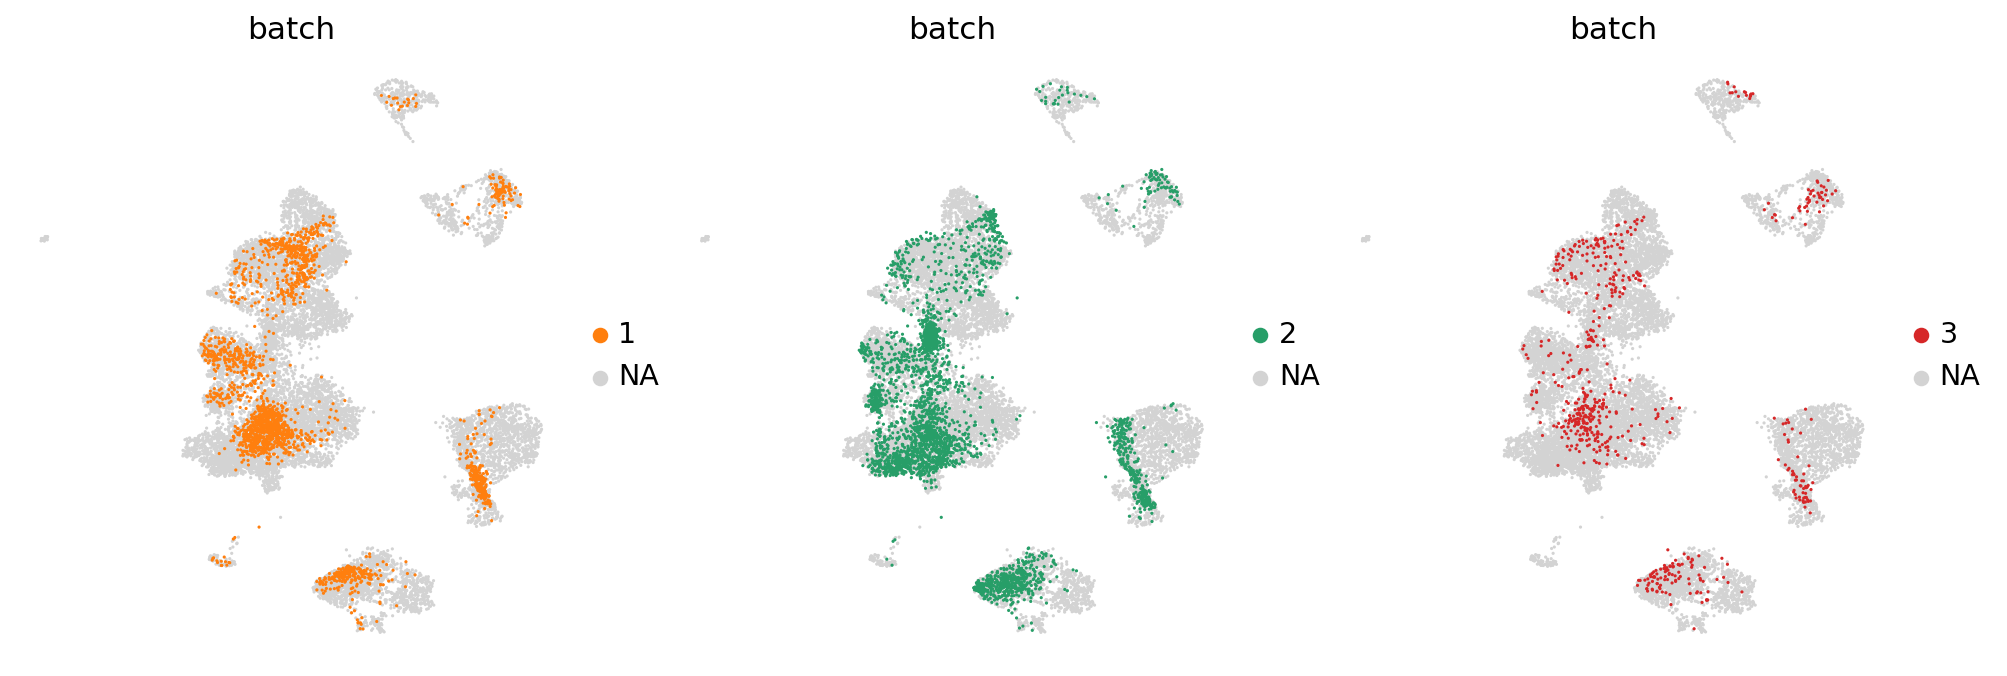

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for batch, ax in zip(["1", "2", "3"], axes):
    sc.pl.umap(adata_concat, color="batch", groups=[batch], ax=ax, show=False)